In [14]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [15]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("/Users/jnucc/Desktop/CacheFiles/*.cali"))
#tk = th.Thicket.from_caliperreader(glob("/Users/jnucc/Downloads/Project_2024/CaliFiles/CaliFilesSampleSort/*.cali"))

  0%|          | 0/49 [00:00<?, ?it/s]

(2/2) Creating Thicket: 100%|██████████| 48/48 [00:00<00:00, 379.36it/s]
c:\Users\jnucc\AppData\Local\Programs\Python\Python312\Lib\site-packages\thicket\ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


View Calltree

In [16]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

90.146 MPI_Comm_dup
0.000 MPI_Finalize
0.000 MPI_Finalized
0.000 MPI_Initialized
7.195 main
├─ nan MPI_Barrier
├─ 0.000 MPI_Init
├─ 0.018 comm
│  ├─ nan MPI_Barrier
│  ├─ nan MPI_Recv
│  ├─ nan MPI_Send
│  ├─ 0.018 comm_large
│  │  ├─ 0.018 MPI_Gather
│  │  │  └─ 0.018 MPI_Gather
│  │  ├─ nan MPI_Isend
│  │  ├─ nan MPI_Recv
│  │  └─ nan MPI_Wait
│  └─ 0.000 comm_small
│     ├─ nan MPI_Recv
│     ├─ nan MPI_Reduce
│     └─ nan MPI_Send
├─ 4.185 comp
│  ├─ nan MPI_Init
│  ├─ 1.285 comp_large
│  │  └─ 1.285 comp_small
│  └─ 92.796 comp_small
│     └─ 92.795 comp_small
├─ 0.000 correctness_check
│  ├─ nan MPI_Recv
│  └─ nan MPI_Send
└─ 0.004 data_init_runtime

Legend (Metric: Avg time/rank Min: 0.00 Max: 92.80 indices: {'profile': 91348491})
█ 83.52 - 92.80
█ 64.96 - 83.52
█ 46.40 - 64.96
█ 27.84 - 46.40
█

Group Performance data by `matrix_size` in the Thicket metadata table.

In [17]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("algorithm")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size", "input_type", "algorithm"]).sort_index()

tk.dataframe

profile  \
node                                              num_procs input_size input_type    algorithm               
{'name': 'MPI_Comm_dup', 'type': 'function'}      16.0      33554432.0 1% Perturbed  column     3355920644   
                                                                       Random        column     3714329917   
                                                                                     radix      2616693993   
                                                                                     sample     2424066192   
                                                                       ReverseSorted column     2446741129   
                                                                                     radix      2035867853   
                                                                                     sample     1066252283   
                                                                       Sorted        column     4278610485   
                                                                                     radix      2285243434   
                                                                                     sample     1985828726   
                                                            67108864.0 Random        column     3751030904   
                                                                                     radix      1428476949   
                                                                                     sample     4190064154   
                                                                       ReverseSorted column     3763412303   
                                                                                     radix      3825943732   
                                                                                     sample     1105146636   
                                                                       Sorted        column     3820789655   
                                                                                     radix       879930968   
                                                                                     sample     2257819740   
                                                  32.0      33554432.0 Random        column     3910106273   
                                                                                     radix      3158163056   
                                                                                     sample      724647313   
                                                                       ReverseSorted column     1327876800   
                                                                                     radix      2862302935   
                                                                                     sample      840229508   
                                                                       Sorted        column     2594005162   
                                                                                     radix      1056969825   
                                                                                     sample     1563555293   
                                                            67108864.0 Random        column     3020132642   
                                                                                     radix      2846406733   
                                                                                     sample      587602627   
                                                                       ReverseSorted column     1059922788   
                                                                                     radix      4208643146   
                                                                                     sample     4170809651   
                                                                       Sorted        column     3066124981   
                             

In [7]:
# Define common variables
processes = [16, 32] 
zeros = [0, 0, 0, 0, 0, 0, 0, 0]
input_sizes = [33554432, 67108864] 
inputs = ["Random", "ReverseSorted", "Sorted", "1_perc_perturbed"]

In [8]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

In [9]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line",
        marker='o',
        title=title,
        xlabel=xlabel,
        ylabel=ylabel,
        figsize=(15,7)
    )
    print(title)
    return plot

C:\Users\jnucc\AppData\Local\Temp\ipykernel_30704\4206675485.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=(tk.dataframe.loc[node, "Min L2 misses/rank (exc)"])


main_33554432


C:\Users\jnucc\AppData\Local\Temp\ipykernel_30704\4206675485.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=(tk.dataframe.loc[node, "Min L2 misses/rank (exc)"])


main_67108864


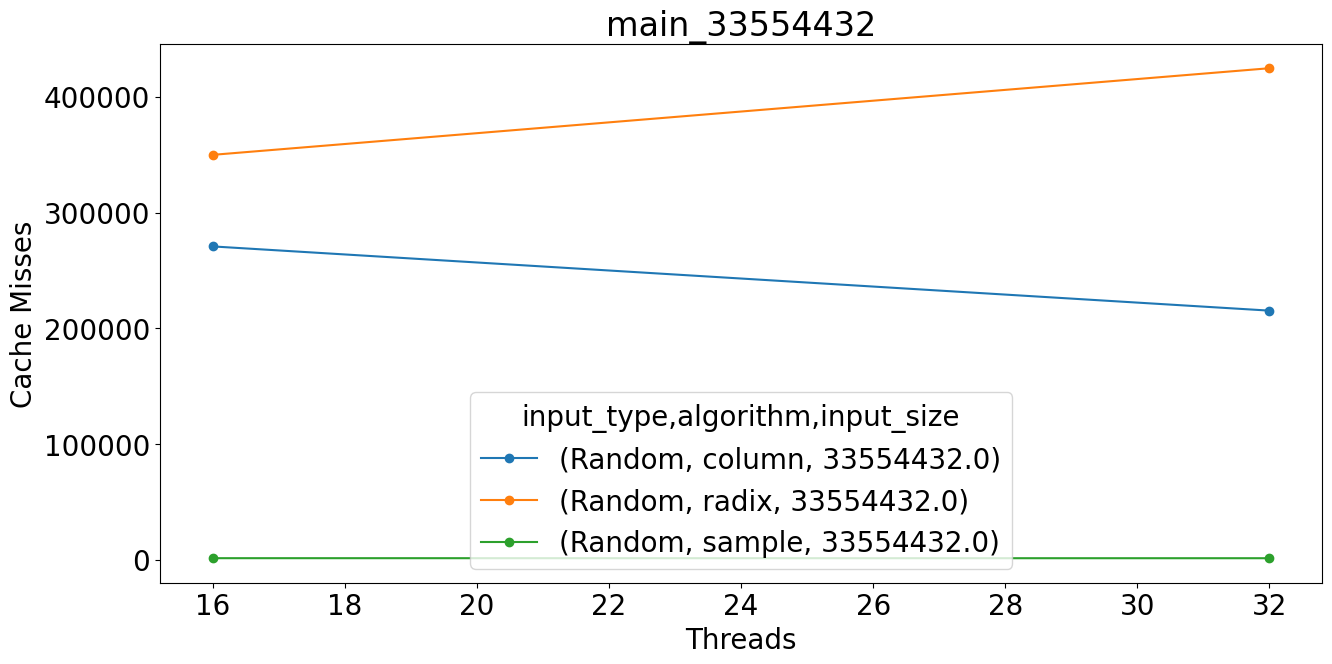

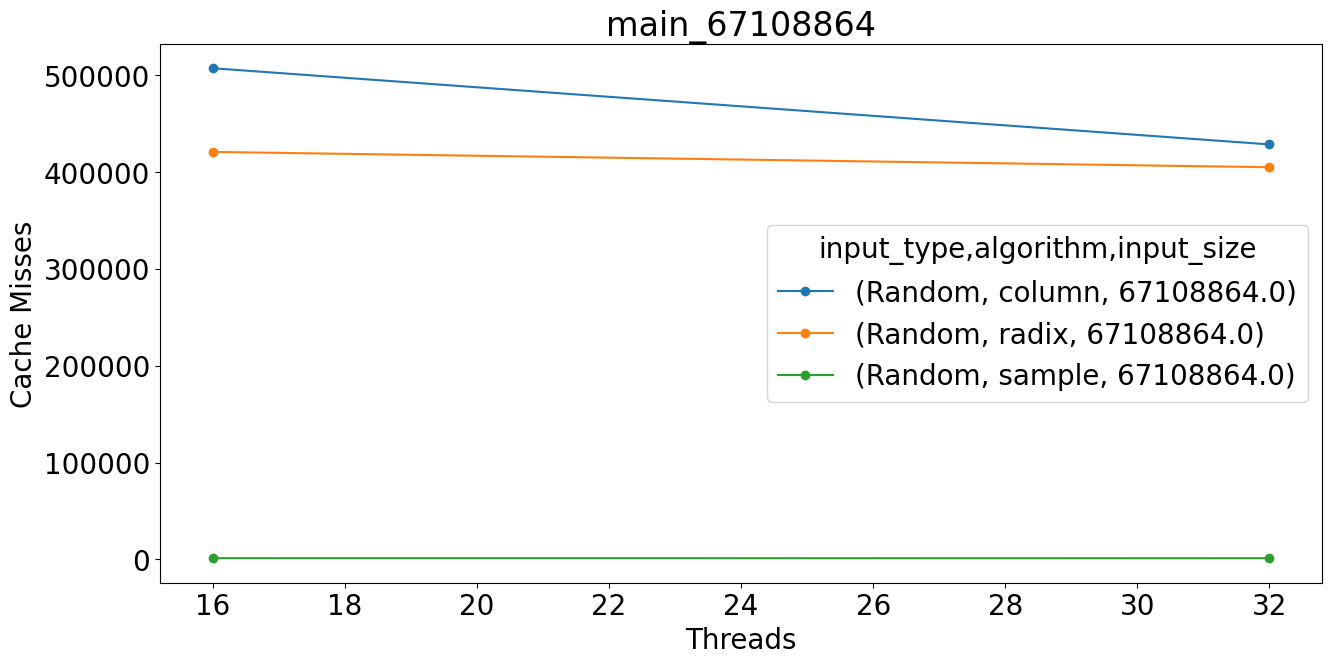

In [13]:
for node in tk.graph.traverse():
    if 'main' in str(node):
        for size in input_sizes:
            df=(tk.dataframe.loc[node, "Min L2 misses/rank (exc)"])
            df = (df.loc[df.index.get_level_values('input_size') == size])
            #df = (df.loc[df.index.get_level_values('algorithm') == "column"])
            df = (df.loc[df.index.get_level_values('input_type') == "Random"])
            df = df.unstack(level="input_type")
            df = df.unstack(level="algorithm")
            df = df.unstack(level="input_size")
            plot_pandas(
                df,
                title=str(node.frame["name"])+"_"+str(size),
                xlabel="Threads",
                ylabel="Cache Misses",
            )
            plt.savefig(str(node.frame["name"])+"_"+str(size)+'.png', dpi=300, bbox_inches='tight')